In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
from matplotlib.pyplot import rc_context
#import besca as bc
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"

In [3]:
adata = sc.read("/Users/stefano.cardinale/scDEAL/scDEAL/saved/adata/GSE1108942022-02-24-10-55-33_I-BET-762.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 1419 × 6644
    obs: 'Plate#', 'Well position', 'Sample name', 'Index-Sort condition', 'Well index', 'sensitive', 'sensitivity', 'Sensitive_score', 'Resistant_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt-', 'pct_counts_mt-', 'total_counts_rps', 'pct_counts_rps', 'total_counts_rpl', 'pct_counts_rpl', 'leiden', 'leiden_origin', 'sens_preds_pret', 'sens_label_pret', 'sens_preds', 'sens_label', 'rest_preds'
    var: 'n_cells', 'mt-', 'rps', 'rpl', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pre', 'X_umap', 'X_umap_origin'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


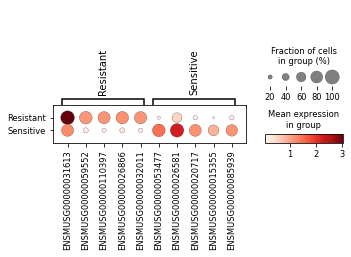

In [31]:
sc.pl.rank_genes_groups_dotplot(adata, groupby='sensitivity', n_genes=5)

In [6]:
adata.obs['pred_groups'] = ['Resistant' if int(i) == 0 else 'Sensitive' for i in adata.obs['sens_label']]
#sc.tl.rank_genes_groups(adata, groupby='sensitivity', n_genes=50, key_added='group_DE_results', method='wilcoxon')

In [15]:
adata.uns['group_DE_results']

{'params': {'groupby': 'sensitivity',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('ENSMUSG00000031613', 'ENSMUSG00000026581'),
            ('ENSMUSG00000059552', 'ENSMUSG00000053477'),
            ('ENSMUSG00000110397', 'ENSMUSG00000051367'),
            ('ENSMUSG00000022283', 'ENSMUSG00000033685'),
            ('ENSMUSG00000026866', 'ENSMUSG00000020717'),
            ('ENSMUSG00000032011', 'ENSMUSG00000001123'),
            ('ENSMUSG00000084235', 'ENSMUSG00000027006'),
            ('ENSMUSG00000025790', 'ENSMUSG00000017707'),
            ('ENSMUSG00000012848', 'ENSMUSG00000085939'),
            ('ENSMUSG00000030527', 'ENSMUSG00000015355'),
            ('ENSMUSG00000021870', 'ENSMUSG00000026395'),
            ('ENSMUSG00000031737', 'ENSMUSG00000022584'),
            ('ENSMUSG00000021831', 'ENSMUSG00000013663'),
            ('ENSMUSG00000089764', 'ENSMUSG00000032050'),
            ('ENSM

In [18]:
#rt = sc.get.rank_genes_groups_df(adata, group='Resistant', key='group_DE_results', pval_cutoff=0.1, log2fc_min=0)['names']
#rp = sc.get.rank_genes_groups_df(adata, group='pred_res', key='group_DE_results_pred', pval_cutoff=0.05, log2fc_min=0)['names']
adata2 = sc.tl.score_genes(adata, rt, copy=True, score_name='resistant_score_truth')
#rt

In [17]:
df=adata.obs
frac = 0.4
idx = df.index.values
#idx = np.random.choice(range(df.shape[0]), int(df.shape[0]*frac), replace=True)
len(idx)

array(['RPI1_A3', 'RPI1_A4', 'RPI1_A5', ..., 'RPI7_P20', 'RPI7_P21',
       'RPI7_P22'], dtype=object)

In [16]:
idx=df.index.values
df.loc[idx, 'pred_group'] = 'Sensitive'
df.loc[df['sensitivity'] == 'Sensitive'].head()
#adata.obs.head()

AttributeError: 'DataFrame' object has no attribute 'Index'

In [29]:
sc.metrics.confusion_matrix(adata.obs['sensitivity'], adata.obs['pred_groups'])

pred_groups,Resistant,Sensitive
sensitivity,,
Resistant,0.915328,0.084672
Sensitive,0.949591,0.050409


In [4]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [37]:
#test2 = sc.tl.rank_genes_groups(adata, 'total_counts')

In [71]:
plotdf = sc.get.obs_df(
        adata,
        keys=["resistant_score", "resistant_score_pred"],
        obsm_keys=[("X_umap", 0), ("X_umap", 1)]
    )

In [72]:
plotdf

,resistant_score,resistant_score_pred,X_umap-0,X_umap-1
RPI1_A3,1.093515,-0.019291,0.498687,-4.150733
RPI1_A4,0.989104,0.009188,-0.039570,-3.913997
RPI1_A5,0.926238,0.056341,0.492289,-2.651699
RPI1_A6,1.076066,0.027159,0.924282,-2.707850
RPI1_A7,1.136625,0.098587,-0.258465,-5.802596
...,...,...,...,...
RPI7_P18,0.982488,0.185592,1.676437,1.296983
RPI7_P19,1.188814,0.090904,1.579555,1.377816
RPI7_P20,1.051113,-0.029626,2.359969,-0.053222
RPI7_P21,1.174360,0.109241,2.554729,0.136436


In [5]:
print(adata.obs['n_genes'])

RPI1_A3     3174
RPI1_A4     3037
RPI1_A5     2181
RPI1_A6     3377
RPI1_A7     2973
            ... 
RPI7_P18    2437
RPI7_P19    2385
RPI7_P20    1828
RPI7_P21     913
RPI7_P22    2532
Name: n_genes, Length: 1378, dtype: int64


In [17]:
adata.obs.shape

(1419, 25)

In [66]:
adata.obs.head()

,Plate#,Well position,Sample name,Index-Sort condition,Well index,sensitive,sensitivity,Resistant_score,Sensitive_score,n_genes,...,leiden,leiden_origin,sens_preds_pret,sens_label_pret,sens_preds,sens_label,rest_preds,resistant_score,pred_groups,resistant_score_pred
RPI1_A3,RPI1,A3,MA9 IBET RESISTANT CELLS,GR+,GGTCTATG,0,Resistant,14.205806,-2.726364,7132,...,4,4,0.000088,0,0.000093,0,0.999912,1.093515,pred_res,-0.019291
RPI1_A4,RPI1,A4,MA9 IBET RESISTANT CELLS,GR+,GTCCGAAT,0,Resistant,10.421613,-2.200808,6815,...,4,4,0.000932,0,0.000131,0,0.999882,0.989104,pred_res,0.009188
RPI1_A5,RPI1,A5,MA9 IBET RESISTANT CELLS,GR+,TAGTGCGT,0,Resistant,5.788548,-1.273636,4951,...,4,4,0.000008,0,0.000067,0,0.999943,0.926238,pred_res,0.056341
RPI1_A6,RPI1,A6,MA9 IBET RESISTANT CELLS,GR+,GACTGTAC,0,Resistant,16.025484,-3.492323,7615,...,4,4,0.000036,0,0.000080,0,0.999922,1.076066,pred_res,0.027159
RPI1_A7,RPI1,A7,MA9 IBET RESISTANT CELLS,GR+,TCCAGTAG,0,Resistant,13.070161,-2.236667,6688,...,4,4,0.000049,0,0.000112,0,0.999897,1.136625,pred_res,0.098587


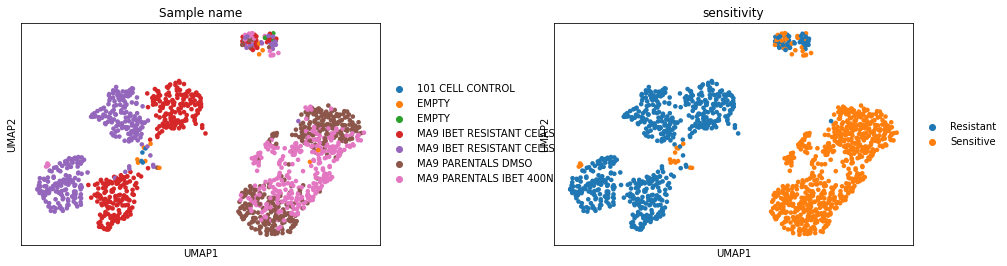

In [81]:
sc.pl.umap(adata, color=['Sample name', 'sensitivity'],  wspace=0.35)

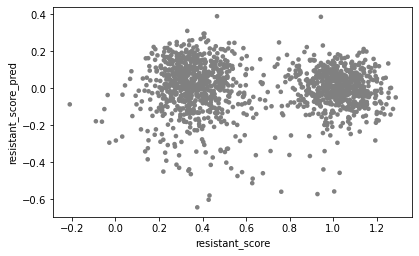

In [70]:
sc.pl.scatter(adata, 'resistant_score', 'resistant_score_pred')

In [25]:
from plotly.figure_factory import create_2d_density
fig = create_2d_density(adata.obs['Sensitive_score'], adata.obs['sens_preds'])
fig.show()

TypeError: plot got an unexpected keyword argument 'x'

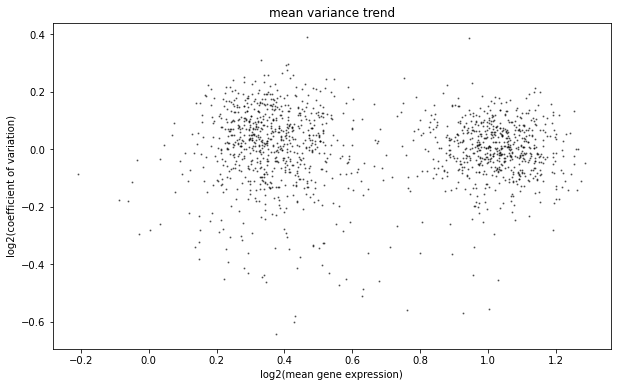

In [65]:
#generate plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x = adata.obs['resistant_score'], y = adata.obs['resistant_score_pred'], alpha = 0.5, s=1, color = 'black')
ax.set_xlabel('log2(mean gene expression)')
ax.set_ylabel('log2(coefficient of variation)')
ax.set_title('mean variance trend')
ax.plot(x = adata.obs['Sensitive_score'], y = adata.obs['sens_preds'], color = 'red', linestyle = 'dashed', label="linear regression")
ax.legend()

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(adata.obs['sensitive'], adata.obs['sens_label'])

0.46370683579985905

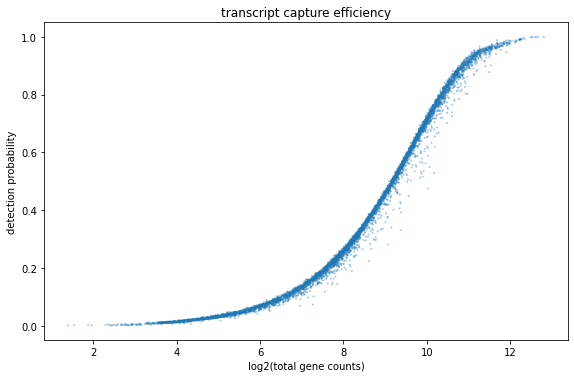

In [10]:
fig, ax = plt.subplots(1)
fig.set_figwidth(8)
fig.set_figheight(5)
fig.tight_layout()

bc.pl.transcript_capture_efficiency(adata,ax=ax)

In [16]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

AttributeError: 'ArrayView' object has no attribute 'A1'

KeyError: 'CD79A'

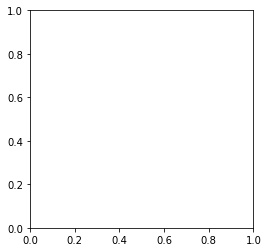

In [6]:
# rc_context is used for the figure size, in this case 4x4
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='CD79A')